# OASIS INFOBYTE INTERNSHIP
## DATA SCIENCE 
## TASK 5 - SALES PREDICTION
### -BY RAFE ANWAR PANJRI

In [27]:


# libraries used in below code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [4]:
df=pd.read_csv("Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.drop(['Unnamed: 0'], axis=1)

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
#data preprocessing

data1=df[['TV','Radio','Newspaper']]
data2=df['Sales']

In [13]:
#train test split  80% training and 20% test
Features_train, Features_test, Sales_train, Sales_test = train_test_split(data1, data2, test_size=0.2,random_state=42)

## Linear Regression

In [15]:
#model training
model = LinearRegression()
model.fit(Features_train, Sales_train)

LinearRegression()

In [17]:
#model evalution

prediction = model.predict(Features_test)
mse = mean_squared_error(Sales_test, prediction)
#average squared difference between the actual values and the predicted values
print(f"Mean Squared Error; {mse*100}")

Mean Squared Error; 317.4097353976101


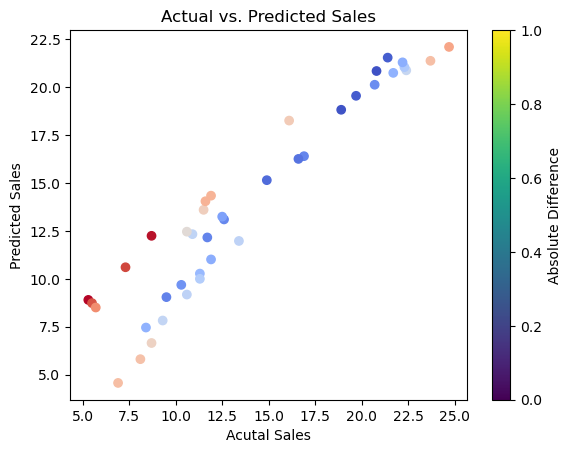

In [18]:
#visualization

#absolute difference between actual and predicted sales for creating colormap
abs_diff = np.abs(Sales_test - prediction)

#create a colormap for colors based on difference
colors = plt.cm.get_cmap('coolwarm')(abs_diff / max(abs_diff)) # Using coolwarm colormap

#scatter plot with different colors based on the difference
plt.scatter(Sales_test, prediction, c=colors)
plt.xlabel("Acutal Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.colorbar(label="Absolute Difference")
plt.show()

In [24]:
# for warning error 
import warnings
warnings.filterwarnings("ignore")

In [25]:
#prediction
#example value

newvalues = np.array([[104.0, 25.6, 10.9]])
sales = model.predict(newvalues)
print(f"Predicted Sales: {sales[0]}")

Predicted Sales: 12.286249999999999


## Random Forest

In [20]:
#training and fit model

model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(Features_train, Sales_train)

RandomForestRegressor(n_estimators=80, random_state=42)

In [21]:
#evalution

prediction = model.predict(Features_test)
mse = mean_squared_error(Sales_test, prediction)
#average squared difference between the actual values and the predicted values
print(f"Mean Squared Error; {mse*100}")

Mean Squared Error; 60.83540624999997


In [26]:
#prediction future sales 

newvalues=np.array([[104.0,25.6,10.9]])
sales = model.predict(newvalues)
print(f"Predicted Sales: {sales[0]}")

Predicted Sales: 12.286249999999999
